In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys, os, django

from django.db.models import Exists, OuterRef
import random

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
sys.path.append('/home/max/software/django-tmv/tmv_mcc-apsis/BasicBrowser')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *
django.db.connection.close()


In [34]:
p = Project.objects.get(pk=178)
df = pd.read_csv('../data/category_predictions.csv')
df.head()


,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,12 - Coastal and marine Ecosystems,12 - Human and managed,...,8 - 8.09. Mixed methods,8 - 8.10. Case studies,8 - 8.11. Remote sensing,9 - observations,12 - Physical systems,"12 - Rivers, lakes, and soil moisture - prediction",12 - Coastal and marine Ecosystems - prediction,12 - Terrestrial ES - prediction,"12 - Mountains, snow and ice - prediction",12 - Human and managed - prediction
0,1375196,This paper provides a detailed description of ...,Relationships between spring snow mass and sum...,0,['Meteorology & Atmospheric Sciences'],0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.056253,0.003454,0.102661,0.184402,0.041294
1,1900274,The link between El Nino-southern oscillation ...,Decadal changes in the link between El Nino an...,El Nino; NAO; Europe-North Africa; precipitati...,['Meteorology & Atmospheric Sciences'],0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.071151,0.005194,0.058398,0.010442,0.019538
2,168908,Changes in hydro-meteorological historical rec...,Hydro-meteorological trends in semi-arid north...,trend detection; variability; climate change; ...,['Water Resources'],0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN
3,799658,Effective monitoring of drought plays an impor...,Effect of Air Temperature on Historical Trend ...,Drought; Temperature; SPI; SPEI; Trend; Divers...,"['Engineering, Civil; Water Resources']",0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.940554,0.003185,0.027934,0.023125,0.025179
4,1469889,Daily streamflow from stations close to five S...,Effect of glaciers on streamflow trends in the...,0,['Environmental Sciences; Limnology; Water Res...,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.855762,0.000829,0.002798,0.854170,0.003372


In [49]:
from mordecai import Geoparser
geo = Geoparser()

Using TensorFlow backend.
/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/max/software/django-tmv/tmv/venv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ma





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [52]:
geo.geoparse("I took the tube from Oxford Circus to London Bridge, via Bank")

'Arctic'

In [66]:
places = []
for p in TextPlace.objects.all():
    try:
        for place in geo.geoparse(p.name):
            places.append(place['geo'])
            print(place)
    except:
        print(p.name)
print(places)
places = pd.DataFrame.from_dict(places)
places.head()

{'word': 'Pakistan', 'spans': [{'start': 0, 'end': 8}], 'country_predicted': 'PAK', 'country_conf': 0.99976367, 'geo': {'admin1': 'Punjab', 'lat': '31.4706', 'lon': '74.3488', 'country_code3': 'PAK', 'geonameid': '7043356', 'place_name': 'Pakistan Foundation Technical Institute', 'feature_class': 'S', 'feature_code': 'SCHC'}}
{'word': 'Punjab', 'spans': [{'start': 0, 'end': 6}], 'country_predicted': 'PAK', 'country_conf': 0.9578358, 'geo': {'admin1': 'Punjab', 'lat': '30.85', 'lon': '72.31667', 'country_code3': 'PAK', 'geonameid': '1167710', 'place_name': 'Punjab Province', 'feature_class': 'A', 'feature_code': 'ADM1'}}
Baluchistan
{'word': 'Canada', 'spans': [{'start': 0, 'end': 6}], 'country_predicted': 'CAN', 'country_conf': 0.9998105, 'geo': {'admin1': 'NA', 'lat': '60.10867', 'lon': '-113.64258', 'country_code3': 'CAN', 'geonameid': '6251999', 'place_name': 'Canada', 'feature_class': 'A', 'feature_code': 'PCLI'}}
{'word': 'Canada', 'spans': [{'start': 14, 'end': 20}], 'country_pre

,admin1,lat,lon,country_code3,geonameid,place_name,feature_class,feature_code
0,Punjab,31.4706,74.3488,PAK,7043356,Pakistan Foundation Technical Institute,S,SCHC
1,Punjab,30.85,72.31667,PAK,1167710,Punjab Province,A,ADM1
2,NA,60.10867,-113.64258,CAN,6251999,Canada,A,PCLI
3,NA,60.10867,-113.64258,CAN,6251999,Canada,A,PCLI
4,NA,34,116,CHN,1807463,Huanghuai Pingyuan,T,PLN


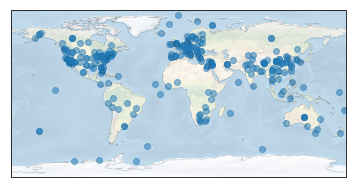

In [68]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(lw=0.1)
ax.stock_img(alpha=0.5)
ax.set_global()
ax.scatter(places['lon'],places['lat'],alpha=0.5)

In [24]:
col_list = []
for l in [12, 11,2]:
    cs = [c for c in df.columns if re.match(f'^{l} - ',c) and "prediction" not in c and "hidden" not in c]
    col_list.append((cs,Category.objects.filter(project=p,level=l).first().parent_category.name.replace('<hidden>','').strip()))
    
col_list

[(['12 - Coastal and marine Ecosystems',
   '12 - Human and managed',
   '12 - Mountains, snow and ice',
   '12 - Rivers, lakes, and soil moisture',
   '12 - Terrestrial ES',
   '12 - Physical systems'],
  'AR5 Category'),
 (['11 - Africa',
   '11 - Asia',
   '11 - Australasia',
   '11 - Central & South America',
   '11 - Europe',
   '11 - Global',
   '11 - North America',
   '11 - Open ocean',
   '11 - Polar Regions',
   '11 - Small Islands'],
  'Region'),
 (['2 - 2.1. Climate change attribution',
   '2 - 2.2 Trend attribution',
   '2 - 2.3. Attribution to extreme event',
   '2 - 2.4. Sensitivity',
   '2 - 2.5. Detection of a regional climate trend (no attribution)',
   '2 - 2.6. Null results'],
  'Attribution')]

In [25]:
base_df = df[["id","title"]]

for i,c in enumerate(col_list):
    cols = ['id'] + c[0]
    cat_df = df[cols]
    var_name = c[1]
    cat_df = cat_df.melt(id_vars=['id'],var_name=var_name).query('value == True')    
    cat_df = cat_df.drop(['value'], axis=1)
    if i == 0:
        long_df = cat_df
    else:
        long_df = pd.merge(long_df, cat_df, how="outer")
        
long_df = base_df.merge(long_df)
long_df = long_df.sort_values('id')
long_df['Region'] = long_df['Region'].str.replace('11 - ','')
long_df['AR5 Category'] = long_df['AR5 Category'].str.replace('12 - ','')


long_df.head()


,id,title,AR5 Category,Region,Attribution
1360,246,A hybrid factorial stepwise-cluster analysis m...,"Rivers, lakes, and soil moisture",Asia,2 - 2.4. Sensitivity
1083,1599,Climate-associated population declines reverse...,Terrestrial ES,NaN,NaN
449,1782,Twentieth century climate change: Evidence fro...,"Mountains, snow and ice",Polar Regions,NaN
1530,2270,Increasing southern invasion enhances congruen...,Coastal and marine Ecosystems,NaN,NaN
506,5570,Climate-driven range changes in Tasmanian inte...,Coastal and marine Ecosystems,NaN,NaN


In [81]:
def plot_geobars(long_df, x, xdict, regions, figsize=(12,8), places =None):
    plt.close()
    fig, ax = plt.subplots(figsize=figsize, dpi=180)

    ax = plt.axes(projection=ccrs.PlateCarree())
    
    ax.coastlines(lw=0.1)
    ax.stock_img(alpha=0.5)
    ax.set_global()
    
    if places is not None:
        ax.scatter(places['lon'],places['lat'],s=7,alpha=0.5,color="#fb9a99")
    
    fig.canvas.draw()

    for r in regions:    
        pdf = long_df[long_df["Region"]==r["name"]][['id','Region',x]].dropna().drop_duplicates()
        n = len(pdf['id'].unique())
        if n == 0:
            continue
        ngroups = len(pdf[x].unique())
        
        a = plt.axes([r["x"],r["y"], .1, .07], transform=ccrs.PlateCarree())    
        a.set_facecolor("none")
        
        pdf.groupby([x]).size().plot(
            kind="bar", ax=a,
            color="none",
            linewidth=1,
            edgecolor="grey"
        )
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.set_title(r["name"].replace(" States","\nStates") + f"- {n}")
        a.set_xlabel("")
        ls = [xdict[l.get_text()] for l in a.get_xticklabels()]
        a.set_xticklabels(ls, rotation=45, ha="right")

        fig.canvas.draw_idle()
        ex = a.get_tightbbox(fig.canvas.get_renderer())
        xy = ax.transData.inverted().transform((ex.x0, ex.y0))
        x2y2 = ax.transData.inverted().transform((ex.x1, ex.y1))
        
        if "alpha" in r:
            alpha=r["alpha"]
        else:
            alpha=0.4

        p_fancy = FancyBboxPatch(xy,
             x2y2[0]-xy[0], x2y2[1]-xy[1],
             boxstyle="round,pad=3",
             alpha=alpha,
             fc="white",
             ec="grey"
        )

        ax.add_patch(p_fancy)
   
    


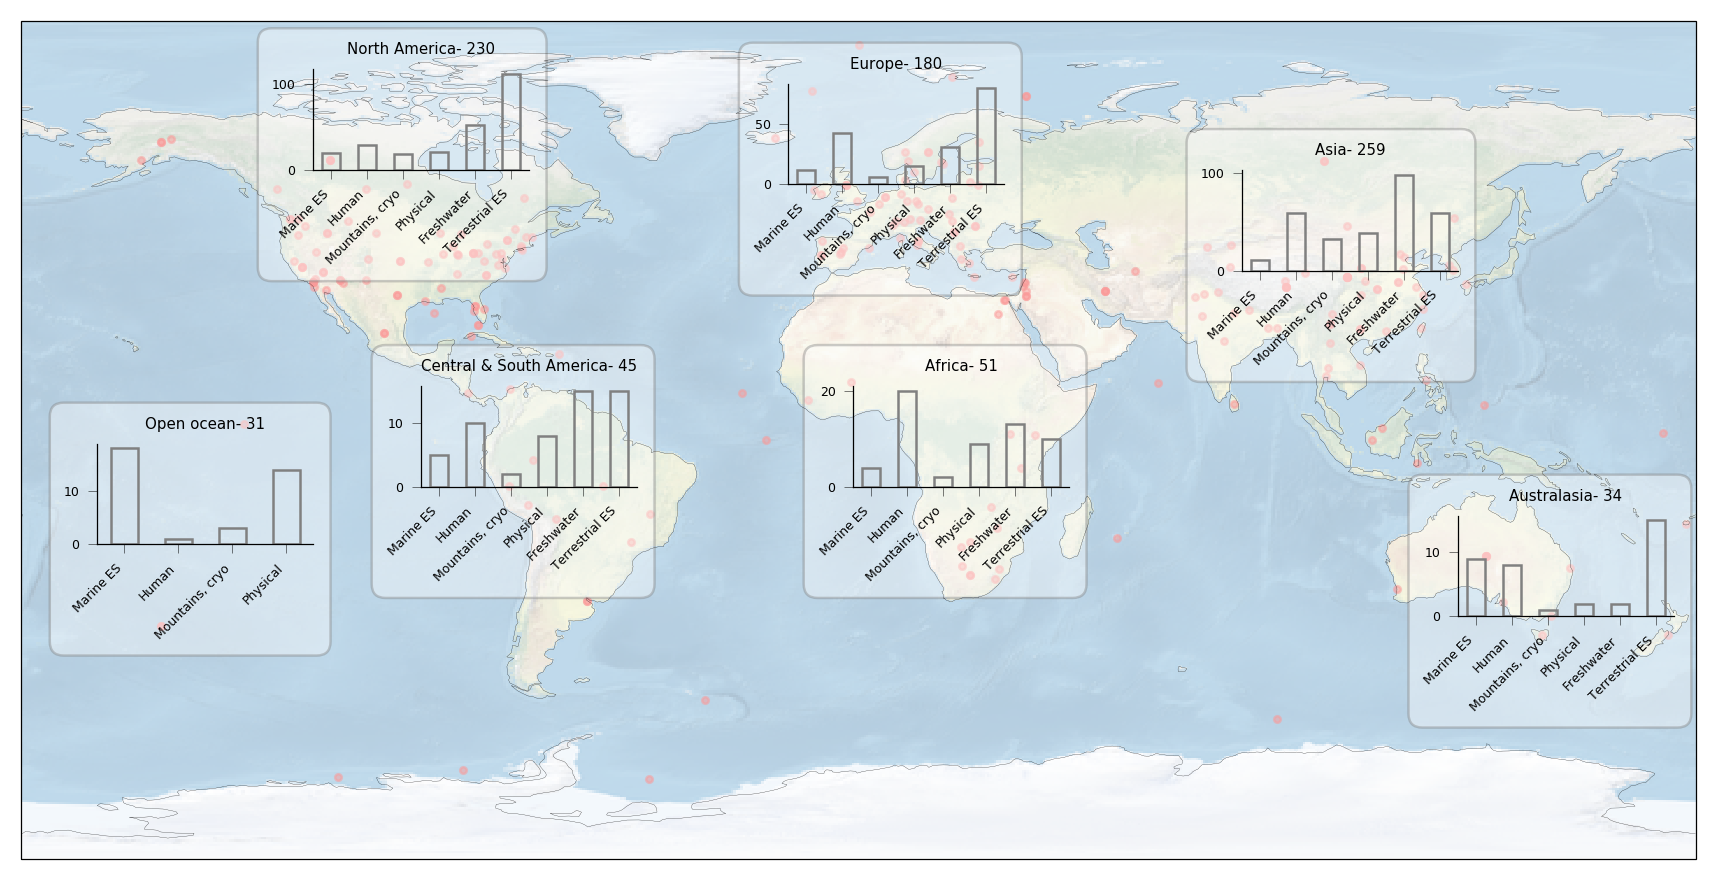

In [85]:
sector_dict = {
    'Rivers, lakes, and soil moisture': "Freshwater",
    'Terrestrial ES': "Terrestrial ES",
    'Mountains, snow and ice': "Mountains, cryo",
    'Coastal and marine Ecosystems': "Marine ES",
    'Physical systems': "Physical",
    'Human and managed': "Human",
}

SMALL_SIZE = 6
MEDIUM_SIZE = 12
BIGGER_SIZE = 12
TICK_SIZE = 5

rc_big = {
    'font.size': SMALL_SIZE,         # controls default text sizes
    'axes.titlesize': SMALL_SIZE,     # fontsize of the axes title
    'axes.labelsize': MEDIUM_SIZE,    # fontsize of the x and y labels
    'xtick.labelsize': TICK_SIZE,    # fontsize of the tick labels
    'ytick.labelsize': TICK_SIZE,   # fontsize of the tick labels
    'legend.fontsize': SMALL_SIZE,    # legend fontsize
    'figure.titlesize': BIGGER_SIZE, # fontsize of the figure title  
    'axes.linewidth': 0.5,
    'ytick.minor.width': 0.2,
    'ytick.major.width': 0.2,
    'xtick.minor.width': 0.2,
    'xtick.major.width': 0.2
}

regions = [
    {"name": "Europe",    "x": 0.48,    "y": 0.68},
    {"name": "Asia", "x": 0.69, "y": 0.62},
    {"name": "Open ocean", "x": 0.16, "y": 0.43},
    {"name": "Australasia", "x": 0.79, "y": 0.38},
    {"name": "North America", "x": 0.26, "y": 0.69},
    {"name": "Central & South America", "x": 0.31, "y": 0.47},
    {"name": "Africa", "x": 0.51, "y": 0.47},
    {"name": "Global or NA", "x": 0.44, "y": 0.29, "alpha":1}
]

with plt.rc_context(rc_big):   
    plot_geobars(long_df, 'AR5 Category', sector_dict, regions, places = places)
    #plt.tight_layout()
    plt.savefig('../plots/map_coded.pdf',bbox_inches="tight")

In [26]:
long_df['Attribution'].unique()

array(['2 - 2.4. Sensitivity', nan, '2 - 2.2 Trend attribution',
       '2 - 2.1. Climate change attribution',
       '2 - 2.3. Attribution to extreme event',
       '2 - 2.5. Detection of a regional climate trend (no attribution)',
       '2 - 2.6. Null results'], dtype=object)

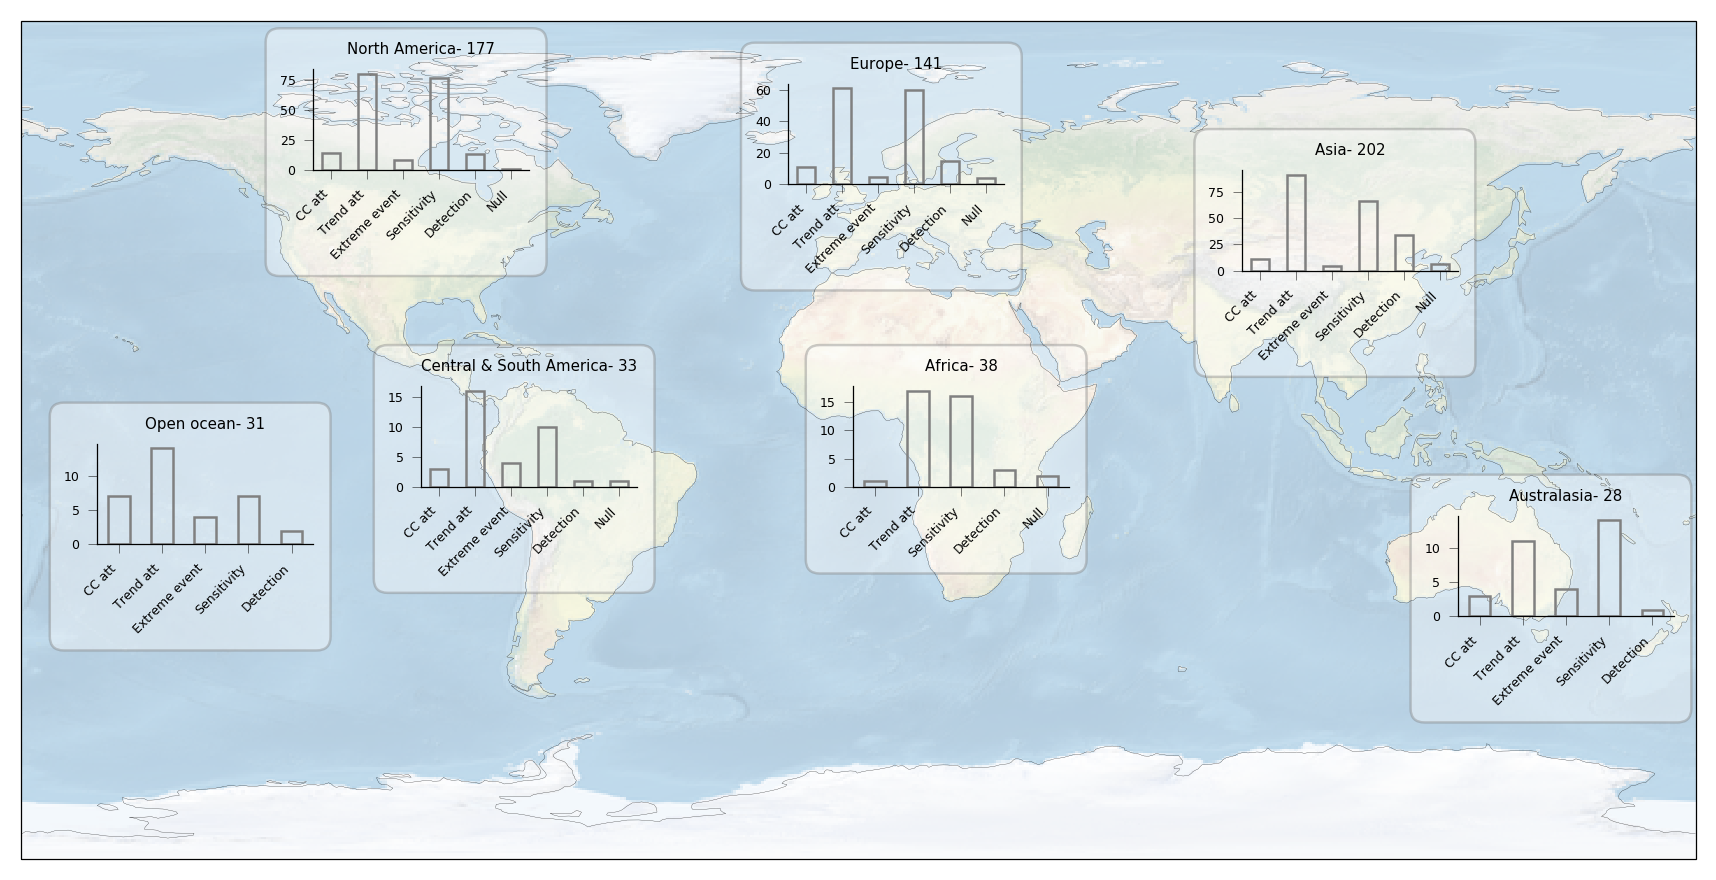

In [27]:
sector_dict = {
    '2 - 2.1. Climate change attribution': "CC att",
    '2 - 2.2 Trend attribution': "Trend att",
    '2 - 2.3. Attribution to extreme event': "Extreme event",
    '2 - 2.4. Sensitivity': "Sensitivity",
    '2 - 2.5. Detection of a regional climate trend (no attribution)': "Detection",
    '2 - 2.6. Null results': "Null",
}

SMALL_SIZE = 6
MEDIUM_SIZE = 12
BIGGER_SIZE = 12
TICK_SIZE = 5

rc_big = {
    'font.size': SMALL_SIZE,         # controls default text sizes
    'axes.titlesize': SMALL_SIZE,     # fontsize of the axes title
    'axes.labelsize': MEDIUM_SIZE,    # fontsize of the x and y labels
    'xtick.labelsize': TICK_SIZE,    # fontsize of the tick labels
    'ytick.labelsize': TICK_SIZE,   # fontsize of the tick labels
    'legend.fontsize': SMALL_SIZE,    # legend fontsize
    'figure.titlesize': BIGGER_SIZE, # fontsize of the figure title  
    'axes.linewidth': 0.5,
    'ytick.minor.width': 0.2,
    'ytick.major.width': 0.2,
    'xtick.minor.width': 0.2,
    'xtick.major.width': 0.2
}


with plt.rc_context(rc_big):   
    plot_geobars(long_df, 'Attribution', sector_dict, regions)

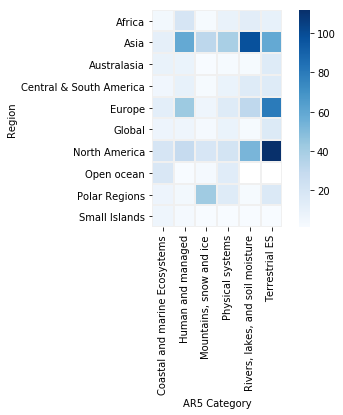

In [28]:
import seaborn as sns
def do_heatmap(df, x, y):
    pdf = df[['id',x,y]].dropna().drop_duplicates().reset_index(drop=True)
    pdf = pdf.groupby([x,y]).size().unstack()
    pdf.head()
   
    ax = sns.heatmap(
        pdf,
        cmap="Blues",
        square=True,
        linecolor="#F0F0F0",
        linewidths=1
    )
    

do_heatmap(long_df, 'Region', 'AR5 Category')

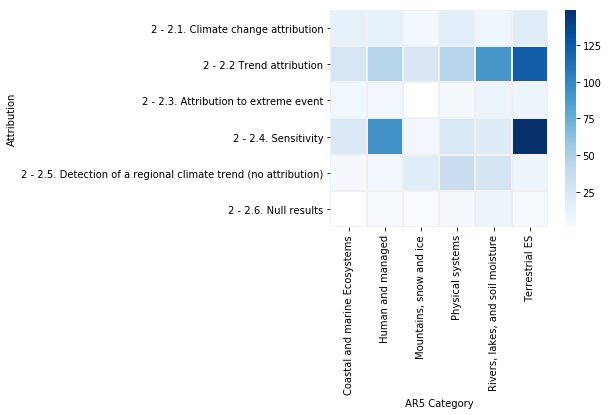

In [29]:
import seaborn as sns
def do_heatmap(df, x, y):
    pdf = df[['id',x,y]].dropna().drop_duplicates().reset_index(drop=True)
    pdf = pdf.groupby([x,y]).size().unstack()
    pdf.head()
   
    ax = sns.heatmap(
        pdf,
        cmap="Blues",
        square=True,
        linecolor="#F0F0F0",
        linewidths=1
    )
    

do_heatmap(long_df, 'Attribution', 'AR5 Category')